In [1]:
#Brían Ó Fearraigh,  Rodrigo G. Ruiz
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual, Output
import ipywidgets as widgets
import IPython
from IPython.display import clear_output, display
from array import array
from ctypes import string_at


import matplotlib.mlab as mlab
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
%precision 6

'%.6f'

## Energy Spectrum (multiple muons) 

The energy spectrum for single muons also applies to the bundle energy spectrum, with $\gamma^{*}, \beta^{*}, \epsilon^{*}$ (to distinguish from the single muon case) now dependent on the multiplicity $M$ and the radial distance to the shower axis $R$. 

The parameter $\gamma^{*}$ is defined as follows in MUPAGE to parametrise the energy of the bundles.
\begin{equation}
    \gamma^{*} = \gamma^{*}(R,h,M) = a(h) \cdot R + b(h,M) \cdot \left ( 1 - \frac{1}{2}e^{q(h)\cdot R} \right ) \, ,
\label{bundleenergy}
\end{equation}
where
\begin{equation}
    a(h) = a_{0}\cdot h + a_{1} \, ,
\end{equation}
\begin{equation}
    b(h,M) = b_{0}(M) \cdot h + b_{1}(M) \, ,
\end{equation}
with
\begin{equation}
    b_{0} =  b_{0a} \cdot M +  b_{0b} \, ,
\end{equation}
\begin{equation}
    b_{1} =  b_{1a} \cdot M +  b_{1b} \, .
\end{equation}

The correction factor has an additional parameter $q$:
\begin{equation}
    q(h) = q_{0}\cdot h + q_{1} \, .
\end{equation}
Finally, the parameter $\epsilon^{*}$ is described by
\begin{equation}
    \epsilon^{*} = \epsilon^{*}(R, h, \theta) = c(R,h) \cdot \theta + d(R,h)
\end{equation}

with

\begin{equation}
    c(R,h) = c_{0}(h) \cdot e^{c_{1} \cdot R} \, ,
\end{equation}
\begin{equation}
    d(R,h) = d_{0}(h) \cdot R^{d_{1}} \, .
\end{equation}
The variables within these equations are only a function of the depth $h$:
\begin{equation}
    c_{0} = c_{0a}\cdot h + c_{0b} \, ,
\end{equation}
\begin{equation}
    d_{0} = d_{0a}\cdot h + d_{0b} \, ,
\end{equation}
\begin{equation}
    d_{1} = d_{1a}\cdot h + d_{1b} \, ,
\end{equation}
while $c_{1}$ is a constant.

In [2]:
a_0 = 0.0033
a_1 = 0.0079

b_0_a = 0.0407
b_0_b = 0.0283
b_1_a = -0.312
b_1_b = 6.124

q_0 = 0.0543
q_1 = -0.365

d_0_a = -0.398
d_0_b = 3.955
d_1_a = 0.012
d_1_b = -0.350

c_0_a = -0.069
c_0_b = 0.488
c_1 = -0.117

beta = 0.420


def a(h, a_0, a_1):
    a = a_0 * h + a_1
    return a 

def b_0(M, b_0_a, b_0_b):
    b_0 = b_0_a * M + b_0_b
    return b_0

def b_1(M, b_1_a, b_1_b):
    b_1 = b_1_a * M + b_1_b
    return b_1

def b(h, M, b_0_a, b_0_b, b_1_a, b_1_b):
    b = b_0(M, b_0_a, b_0_b) * h + b_1(M,b_1_a, b_1_b)
    return b

def q(h, q_0, q_1):
    q = q_0 * h + q_1
    return q

def gamma(R , h , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1):
    gamma = a(h, a_0, a_1) * R + b(h, M, b_0_a, b_0_b, b_1_a, b_1_b) * (1 - 0.5 * np.exp(q(h, q_0, q_1) * R))
    return gamma

def d_0(h, d_0_a, d_0_b):
    d_0 = d_0_a * h + d_0_b
    return d_0

def d_1(h, d_1_a, d_1_b):
    d_1 = d_1_a * h + d_1_b
    return d_1

def d(R,h, d_0_a, d_0_b, d_1_a, d_1_b):
    d = d_0(h, d_0_a, d_0_b) * np.power(R , d_1(h, d_1_a, d_1_b))
    return d

def c_0(h, c_0_a, c_0_b):
    c_0 = c_0_a * h + c_0_b
    return c_0

def c(R, h, c_0_a, c_0_b, c_1):
    c = c_0(h, c_0_a, c_0_b) * np.exp(c_1 * R)
    return c

def epsilon(R , h , theta, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b):
    epsilon = c(R,h, c_0_a, c_0_b, c_1) * theta + d(R,h, d_0_a, d_0_b, d_1_a, d_1_b)
    return epsilon

#differential, energy spectrum

def Spectrum(R , E , h , theta , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b):
    Gamma = gamma(R , h , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1)
    Epsilon = epsilon(R , h , theta, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b)
    X = h/np.cos(theta)
    G = 2.30*(Gamma - 1) * np.power(Epsilon , (Gamma - 1)) * np.exp((Gamma - 1) * beta * X) * np.power((1 - np.exp(-beta * X)) , (Gamma - 1))
    Spec = G * E * np.exp(beta * X * (1 - Gamma)) * np.power((E + Epsilon*(1 - np.exp(-beta * X))) , -Gamma)
    return Spec

In [3]:
Emin = 0.001
Emax = 10
npointsE = 2000
deltaE = (Emax-Emin)/npointsE
npointslogE = 200
deltalogE = (np.log10(Emax)-np.log10(Emin))/npointslogE


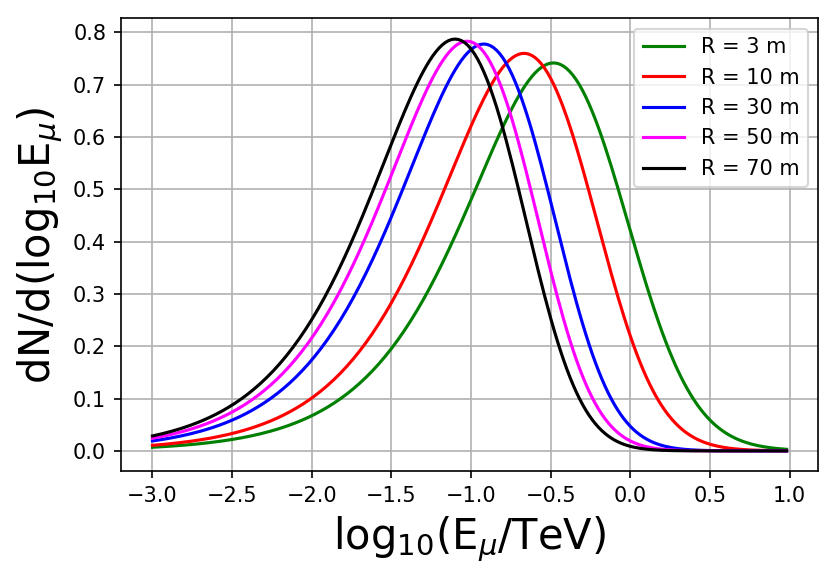

In [5]:
LogEner = []
Ener  = []
Spectrums = []
R  = [5 , 10 , 30 , 50 , 70]
depth = 4.5
M = 2
zenith_angle = 0.0

for i in range(len(R)):
    spectrum = []
    Ens = []
    LogEns = []
    for j in range(npointslogE):
        logE = np.log10(Emin) + deltalogE * j
        E = np.power(10 , logE)
        Ens.append(E)
        LogEns.append(logE)
        spectrum.append(Spectrum(R[i] , E , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b))
    Spectrums.append(spectrum)
    Ener.append(Ens)
    LogEner.append(LogEns)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(LogEner[0], Spectrums[0],'green',  label=r'R = 3 m')
ax.plot(LogEner[1], Spectrums[1],'red',  label=r'R = 10 m')
ax.plot(LogEner[2], Spectrums[2],'blue',  label=r'R = 30 m')
ax.plot(LogEner[3], Spectrums[3],'magenta',  label=r'R = 50 m')
ax.plot(LogEner[4], Spectrums[4],'black',  label=r'R = 70 m')

plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 20)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 20)
plt.grid(True)
plt.rcParams['figure.dpi'] = 150
plt.legend()
plt.show()


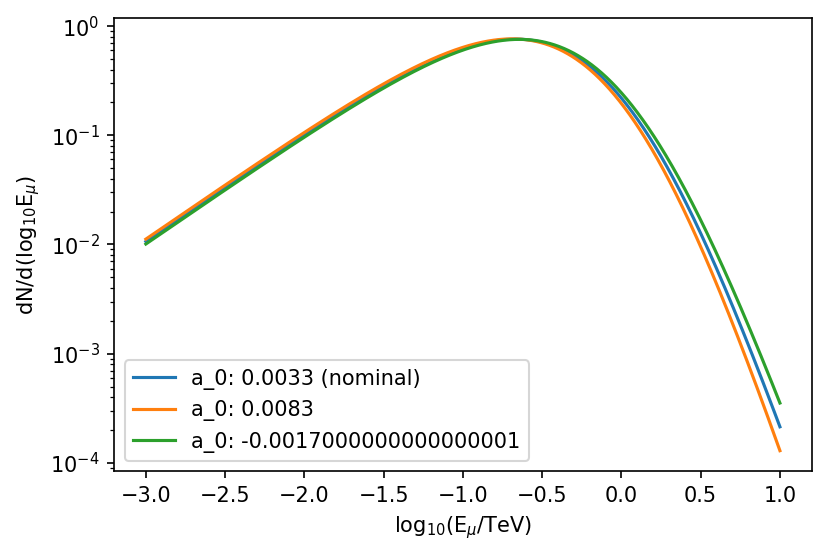

In [6]:
zenith_angle = 0
h = 2.785
R = 10

Energy = np.arange(0.001,10,0.001)

plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'a_0: '+ str(a_0) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0 + 0.005, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b,d_1_a, d_1_b), label = 'a_0: '+ str(a_0 + 0.005))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0 - 0.005, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'a_0: '+ str(a_0 - 0.005))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'a_1: '+ str(a_1) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1 + 0.05, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'a_1: '+ str(a_1 + 0.05))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1 - 0.05, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'a_1: '+ str(a_1 - 0.05))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_0_a: '+ str(b_0_a) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a + 0.02, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_0_a: '+ str(b_0_a + 0.02))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a - 0.02, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_0_a: '+ str(b_0_a - 0.02))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_0_b: '+ str(b_0_b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b + 0.05, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_0_b: '+ str(b_0_b + 0.05))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b - 0.05, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_0_b: '+ str(b_0_b - 0.05))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_1_a: '+ str(b_1_a) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a + 0.1, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_1_a: '+ str(b_1_a + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a - 0.1, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_1_a: '+ str(b_1_a - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_1_b: '+ str(b_1_b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b + 2.0, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_1_b: '+ str(b_1_b + 2.0))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b - 2.0, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'b_1_b: '+ str(b_1_b - 2.0))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'q_0: '+ str(q_0) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0 + 0.02, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'q_0: '+ str(q_0 + 0.02))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0 - 0.02, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'q_0: '+ str(q_0 - 0.02))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'q_1: '+ str(q_1) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1 + 0.1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'q_1: '+ str(q_1 + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1 - 0.1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'q_1: '+ str(q_1 - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_a: '+ str(c_0_a) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_a: '+ str(c_0_a + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a - 0.01, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_a: '+ str(c_0_a - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_b: '+ str(c_0_b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b + 1, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_b: '+ str(c_0_b + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b - 0.01, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_b: '+ str(c_0_b - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_b: '+ str(c_0_b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1 + 1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_b: '+ str(c_0_b + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1 - 0.01, d_0_a, d_0_b, d_1_a, d_1_b), label = 'c_0_b: '+ str(c_0_b - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'd_0_a: '+ str(d_0_a) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a + 0.1, d_0_b, d_1_a, d_1_b), label = 'd_0_a: '+ str(d_0_a + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a - 0.1, d_0_b, d_1_a, d_1_b), label = 'd_0_a: '+ str(d_0_a - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'd_0_b: '+ str(d_0_b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b + 0.2, d_1_a, d_1_b), label = 'd_0_b: '+ str(d_0_b + 0.2))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b - 0.2, d_1_a, d_1_b), label = 'd_0_b: '+ str(d_0_b - 0.2))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'd_1_a: '+ str(d_1_a) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a + 0.01, d_1_b), label = 'd_1_a: '+ str(d_1_a + 0.01))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a - 0.01, d_1_b) , label = 'd_1_a: '+ str(d_1_a - 0.01))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b), label = 'd_1_b: '+ str(d_1_b) + ' (nominal)' )
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b + 0.1), label = 'd_1_b: '+ str(d_1_b + 0.1))
plt.plot( np.log10(Energy) , Spectrum(R , Energy , depth , zenith_angle , M, a_0, a_1, b_0_a, b_0_b, b_1_a, b_1_b, q_0, q_1, c_0_a, c_0_b, c_1, d_0_a, d_0_b, d_1_a, d_1_b - 0.1) , label = 'd_1_b: '+ str(d_1_b - 0.1))
plt.xlabel(r'log$_{10}$(E$_{\mu}$/TeV)', fontsize = 10)
plt.ylabel(r'dN/d(log$_{10}$E$_{\mu}$)', fontsize = 10)
plt.rcParams['figure.dpi'] = 150
plt.yscale("log")
plt.legend()
plt.show()